# Parabolic SAR

FF-21	Parabolic SAR   = high, low, acceleration=0.02, maximum=0

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

https://en.wikipedia.org/wiki/Parabolic_SAR
parabolic SAR (parabolic stop and reverse) is a method devised by J. Welles Wilder, Jr., to find potential reversals in the market price direction  
It is a trend-following (lagging) indicator and may be used to set a trailing stop loss or determine entry or exit points based on prices tending to stay within a parabolic curve during a strong trend.  

Wilder recommends first establishing the direction or change in direction of the trend through the use of parabolic SAR, and then using a different indicator such as the Average Directional Index to determine the strength of the trend.  

https://www.investopedia.com/trading/introduction-to-parabolic-sar  
The parabolic SAR attempts to give traders an edge by highlighting the direction an asset is moving, as well as providing entry and exit points. 



```
Overlap Studies
SAR                  Parabolic SAR
SAREXT               Parabolic SAR - Extended

```
https://mrjbq7.github.io/ta-lib/ 


```
SAR - Parabolic SAR
real = SAR(high, low, acceleration=0, maximum=0)

SAREXT - Parabolic SAR - Extended
real = SAREXT(high, low, startvalue=0, offsetonreverse=0, accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
```

Also for ta:  
'trend_psar_up', 'trend_psar_down', 'trend_psar_up_indicator', 'trend_psar_down_indicator'

In [1]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

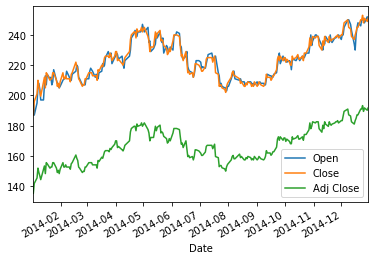

In [2]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily[['Open','Close','Adj Close']].plot()

In [3]:

from ta import add_all_ta_features
from ta.utils import dropna

inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}
# Note the use of Close instead of Adj Close.

sar = SAR(inputs)
sar_e = SAREXT(inputs)

daily = add_all_ta_features(daily, open="Open", high="High", low="Low", close="Close", volume="Volume")

slowk, slowd = STOCH(inputs, fastk_period=10, prices=['high', 'low', 'close']) # No need for period.!! Check out the C documentation.

daily.loc[:,("SAR")] = sar.tolist()
daily.loc[:,("SAR-E")] = sar_e.tolist()
daily.tail()



/opt/conda/lib/python3.7/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/conda/lib/python3.7/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,SAR,SAR-E
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,193.273026,-5.005559e+06,213623400.0,0.222698,6.340093e+06,...,243.129319,2.016129,4.009376,11.660023,-7.650647,1.200000,1.192857,35.294118,221.616512,221.616512
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,189.453384,-5.596826e+06,211849600.0,0.194908,4.167365e+06,...,243.239696,-0.800000,-2.532403,8.821538,-11.353940,-1.976285,-1.996074,32.620321,222.911852,222.911852
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,191.745163,-3.144126e+06,214302300.0,0.206448,4.623184e+06,...,244.149666,2.448980,-7.243628,5.608505,-12.852132,1.209677,1.202419,34.224599,224.155377,224.155377
2014-12-29,253.0,248.0,252.0,249.0,2282500.0,190.217331,-4.513626e+06,212019800.0,0.188726,3.310587e+06,...,244.718414,2.049180,-11.512135,2.184377,-13.696512,-0.796813,-0.800004,33.155080,225.349162,225.349162
2014-12-30,252.0,247.0,249.0,251.0,2302600.0,191.745163,-3.132066e+06,214322400.0,0.217800,3.495531e+06,...,245.400251,5.020921,-15.084623,-1.269423,-13.815199,0.803213,0.800004,34.224599,226.495196,226.495196


# Plot of ADX on the original time-series

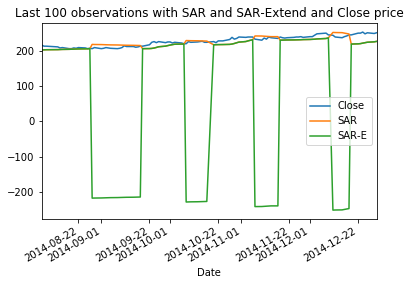

In [4]:
daily[['Close','SAR', 'SAR-E']][-100:].plot(title="Last 100 observations with SAR and SAR-Extend and Close price")

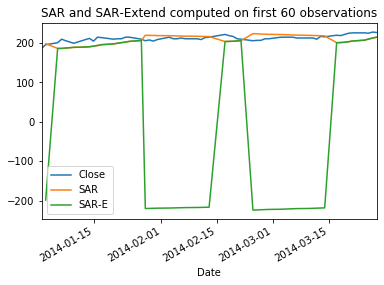

In [12]:
daily[['Close','SAR', 'SAR-E']][:60].plot(title="SAR and SAR-Extend computed on first 60 observations")

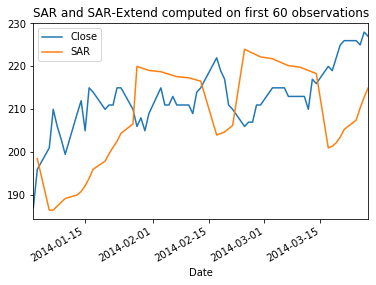

In [17]:
daily[['Close','SAR']][:60].plot(title="SAR and SAR-Extend computed on first 60 observations")

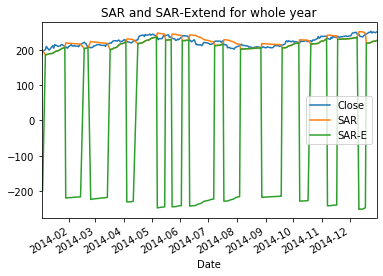

In [13]:
daily[['Close','SAR', 'SAR-E']].plot(title="SAR and SAR-Extend for whole year")

In [14]:
daily.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'volume_adi',
       'volume_obv', 'volume_cmf', 'volume_fi', 'volume_mfi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_nvi', 'volume_vwap',
       'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx',
       'trend_adx_pos', 'trend_adx_neg', 'trend_vortex_ind_pos',
       'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix',
       'trend_mass_index', 'trend_cci', 'trend_dpo', 'trend_kst',
     

In [16]:
daily[['trend_psar_up', 'trend_psar_down', 'trend_psar_up_indicator', 'trend_psar_down_indicator']].dropna()

,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator
Date,,,,


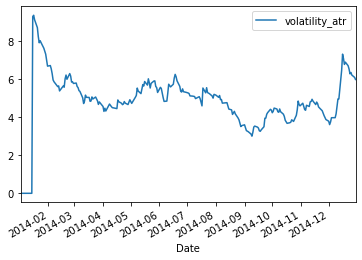

In [9]:
daily[['volatility_atr']].dropna().plot()

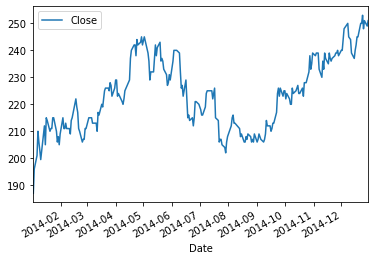

In [10]:
daily[['Close']].dropna().plot()